In [ ]:
# Loading libraries
import pandas as pd

In [ ]:
# Loading Data set 
Solar_Installation ='Solar_Footprints_V2_5065925295652909767.csv'
df = pd.read_csv(Solar_Installation)

In [ ]:
df.head()

,OBJECTID,County,Acres,Install Type,Urban or Rural,Combined Class,Distance to Substation (Miles) GTET 100 Max Voltage,Percentile (GTET 100 Max Voltage),Substation Name GTET 100 Max Voltage,HIFLD ID (GTET 100 Max Voltage),...,Percentile (GTET 200 Max Voltage),Substation Name GTET 200 Max Voltage,HIFLD ID (GTET 200 Max Voltage),Distance to Substation (Miles) CAISO,Percentile (CAISO),Substation CASIO Name,HIFLD ID (CAISO),Solar Technoeconomic Intersection,Shape__Area,Shape__Length
0,1,Alameda County,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.272283,0 to 25th,Los Esteros,310258.0,Within,6768.954679,365.801336
1,2,Alameda County,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.392816,0 to 25th,Los Esteros,310258.0,Within,7677.228982,366.909878
2,3,Alameda County,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.537298,0 to 25th,Los Esteros,310258.0,Within,5162.935990,290.576263
3,4,Alameda County,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.626699,0 to 25th,Los Esteros,310258.0,Within,5763.905754,344.705846
4,5,Alameda County,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0 to 25th,Dixon Landing,309200.0,...,0 to 25th,Los Esteros,310258.0,2.728629,25th to 50th,Los Esteros,310258.0,Within,3983.859693,283.968426


In [ ]:
# Attempting to understand the structure of the data 
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   OBJECTID                                             5397 non-null   int64  
 1   County                                               5397 non-null   object 
 2   Acres                                                5397 non-null   float64
 3   Install Type                                         5397 non-null   object 
 4   Urban or Rural                                       5397 non-null   object 
 5   Combined Class                                       5397 non-null   object 
 6   Distance to Substation (Miles) GTET 100 Max Voltage  5397 non-null   float64
 7   Percentile (GTET 100 Max Voltage)                    5397 non-null   object 
 8   Substation Name GTET 100 Max Voltage                 5397 non-null  

(5397, 21)

### Streamline the `df` DataFrame by removing non-essential columns to focus on relevant data for solar analysis.

### Approach and Rationale

We create a list of columns to drop, each with a specific reason:

- **`OBJECTID`**: Unique identifier with no analytical value.
- **`Combined Class`**: Redundant data already covered by `Install Type` and `Urban or Rural`.
- **`HIFLD ID (GTET 100 Max Voltage)`, `HIFLD ID (GTET 200 Max Voltage)`, `HIFLD ID (CAISO)`**: Substation identifiers not required for this analysis.

Dropping these columns improves focus and processing speed, keeping only meaningful data. Using `errors='ignore'` ensures smooth execution even if any column is missing.

In [ ]:
# Dropping non-essential columns as identified, with a brief reason for each

# List of columns to drop
columns_to_drop = [
    'OBJECTID',              # Unique identifier with no analytical value
    'Combined Class',        # Redundant information already available in 'Install Type' and 'Urban or Rural'
    'HIFLD ID (GTET 100 Max Voltage)',     # Substation identifier, not needed for analysis
    'HIFLD ID (GTET 200 Max Voltage)',     # Substation identifier, not needed for analysis
    'HIFLD ID (CAISO)'        # Substation identifier, not needed for analysis
   


]

# Dropping columns
solar_data_cleaned = df.drop(columns=columns_to_drop,errors='ignore')




The code `solar_data_cleaned.isnull().sum()` calculates the total number of missing values in each column of the `solar_data_cleaned` DataFrame. This summary helps identify any columns with missing data that may require further attention, such as filling, dropping, or other data cleaning methods, to ensure data completeness and reliability for analysis.

In [ ]:
# Finding if there arae any missing values that needs to be given attention to 
solar_data_cleaned.isnull().sum()

County                                                  0
Acres                                                   0
Install Type                                            0
Urban or Rural                                          0
Distance to Substation (Miles) GTET 100 Max Voltage     0
Percentile (GTET 100 Max Voltage)                       0
Substation Name GTET 100 Max Voltage                    0
Distance to Substation (Miles) GTET 200 Max Voltage     0
Percentile (GTET 200 Max Voltage)                       0
Substation Name GTET 200 Max Voltage                    0
Distance to Substation (Miles) CAISO                    0
Percentile (CAISO)                                      0
Substation CASIO Name                                  10
Solar Technoeconomic Intersection                       0
Shape__Area                                             0
Shape__Length                                           0
dtype: int64

### Filling Missing Values

The code fills missing values in the `Substation CASIO Name` column of the `solar_data_cleaned` DataFrame with the placeholder `"Unknown"`. This approach retains records with missing substation names while clearly indicating cases where the information is unavailable, preserving data integrity and completeness for further analysis.

In [ ]:
# Filling missing values in 'Substation_CAISO' with the placeholder "Unknown"
solar_data_cleaned['Substation CASIO Name'].fillna("Unknown", inplace=True)

# Verify that there are no remaining missing values
missing_values_after_filling = solar_data_cleaned.isnull().sum()
missing_values_after_filling


County                                                 0
Acres                                                  0
Install Type                                           0
Urban or Rural                                         0
Distance to Substation (Miles) GTET 100 Max Voltage    0
Percentile (GTET 100 Max Voltage)                      0
Substation Name GTET 100 Max Voltage                   0
Distance to Substation (Miles) GTET 200 Max Voltage    0
Percentile (GTET 200 Max Voltage)                      0
Substation Name GTET 200 Max Voltage                   0
Distance to Substation (Miles) CAISO                   0
Percentile (CAISO)                                     0
Substation CASIO Name                                  0
Solar Technoeconomic Intersection                      0
Shape__Area                                            0
Shape__Length                                          0
dtype: int64

### To determine 

which regions, urban or rural, have larger solar installation footprints by analyzing the total acreage used for solar installations across counties and classifications.

1. **Aggregate Data by County and Urban/Rural Classification**:
   - Grouping the data by `County` and `Urban or Rural`, then summing the `Acres` column to calculate the total area of solar installations for each combination.This aggregation provides a clear picture of the solar footprint across different regions, allowing for comparison between urban and rural installations within each county.

2. **Box Plot Visualization**:
   - **What we’re doing**: Using a box plot, we visualize the distribution of `Acres` for each County and Urban/Rural classification.
   - **Why this is effective**: The box plot provides a visual summary of the spread and central tendency of solar installation areas, highlighting differences between urban and rural regions. It also reveals any outliers, indicating counties with unusually large or small installations.


This method provides both a numerical and visual comparison, making it easy to interpret which regions tend to have larger solar footprints. The aggregation captures the total footprint, while the box plot illustrates distribution trends across counties and classifications, offering a comprehensive view of urban vs. rural installation sizes.

In [ ]:
# Aggregate data by County and Urban or Rural, summing the 'Acres' column
aggregated_data = solar_data_cleaned.groupby(['County', 'Urban or Rural'])['Acres'].sum().reset_index()

In [ ]:
aggregated_data

,County,Urban or Rural,Acres
0,Alameda County,Rural,1.939749
1,Alameda County,Urban,405.078807
2,Amador County,Rural,9.747331
3,Butte County,Rural,76.677146
4,Butte County,Urban,52.316805
...,...,...,...
86,Ventura County,Urban,207.113638
87,Yolo County,Rural,109.590984
88,Yolo County,Urban,107.570763
89,Yuba County,Rural,17.192576


To understand which regions—urban or rural—have larger solar installation footprints, we start by grouping the data by county and region type (urban or rural) and summing up the acreage (`Acres`). This allows us to see the total area covered by solar installations in each region type within each county.

Using a box plot of the filtered data helps to easily compare the acreage distribution across urban and rural regions within these top counties. This approach effectively reduces noise in the visualization, making it easy to see patterns and differences in solar installation sizes across different types of regions.

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np


# Define the number of top counties you want to display
top_n = 5  # Adjust this value as needed

# Get the top n counties based on the total acres
top_counties = aggregated_data.groupby('County')['Acres'].sum().nlargest(top_n).index

# Aggregate data for urban and rural categories
urban_rural_totals = aggregated_data.pivot_table(
    index="County", columns="Urban or Rural", values="Acres", aggfunc="sum"
).loc[top_counties].fillna(0)

# Create the bar chart
fig = go.Figure()

# Add Urban bars
fig.add_trace(go.Bar(
    x=urban_rural_totals.index,
    y=urban_rural_totals["Urban"],
    name="Urban",
    marker=dict(color="lightblue"),
    text=urban_rural_totals["Urban"].round(0).astype(int),  # Round and convert to integer
    textposition="outside",  # Position labels outside the bars
    hovertemplate="County: %{x}<br>Urban Acres: %{y:,}<extra></extra>"
))

# Add Rural bars
fig.add_trace(go.Bar(
    x=urban_rural_totals.index,
    y=urban_rural_totals["Rural"],
    name="Rural",
    marker=dict(color="lightgreen"),
    text=urban_rural_totals["Rural"].round(0).astype(int),  # Round and convert to integer
    textposition="outside",  # Position labels outside the bars
    hovertemplate="County: %{x}<br>Rural Acres: %{y:,}<extra></extra>"
))


# Update layout for better aesthetics
fig.update_layout(
    title=f"Total Urban vs Rural Acres in Top {top_n} Counties",
    xaxis_title="County",
    yaxis_title="Total Acres",
    barmode="group",  # Grouped bar chart
    xaxis=dict(tickangle=90),
    legend_title="Urban or Rural",
    height=600,
    width=1000
)

# Show the interactive plot
fig.show()

In [ ]:
# Checking for unique values and any inconsistencies in the 'Urban or Rural' column
urban_rural_values = solar_data_cleaned['Urban or Rural'].value_counts(dropna=False)

# Checking for missing values across the dataset
missing_values = solar_data_cleaned.isnull().sum()

urban_rural_values, missing_values[missing_values > 0]


(Urban or Rural
 Urban    3631
 Rural    1766
 Name: count, dtype: int64,
 Series([], dtype: int64))

### Observations and Insights on Distance to Substation by Urban/Rural Classification

#### **Key Findings**
1. **Overall Distribution**:
   - Urban areas show a higher frequency of locations with shorter distances to substations, as evident by the steep peak near the lower end of the distance scale.
   - Rural areas, while having lower frequencies overall, display a wider distribution with some sites located significantly farther from substations.

2. **Voltage-Specific Observations**:
   - **GTET 100 Max Voltage**: The urban areas dominate short-distance frequencies with a sharp decline as distance increases, whereas rural areas exhibit a gradual decline, reflecting more evenly distributed distances.
   - **GTET 200 Max Voltage**: Similar trends are observed, with urban areas clustered closer to substations and rural areas spread over larger distances.
   - **CAISO**: Urban areas remain concentrated near substations, but rural areas still extend farther away compared to urban counterparts, albeit with slightly reduced frequencies at extreme distances.

3. **Implications for Infrastructure Planning**:
   - **Urban Areas**:
     - Proximity to substations suggests that urban infrastructure is optimized for minimal transmission loss and efficient power delivery.
   - **Rural Areas**:
     - Wider spread and greater distances highlight challenges in providing reliable and efficient power, likely requiring targeted investments in transmission networks or localized solutions like microgrids.

4. **Comparative Analysis**:
   - Across all scenarios, the disparity between urban and rural distances underscores the need for differentiated strategies to enhance energy access in rural regions.

#### **Recommendations**:
- **Infrastructure Investments**: Increase substation density or integrate decentralized energy systems in rural areas to improve efficiency and reliability.
- **Policy Focus**: Support rural electrification programs to address equity in energy access.
- **Further Analysis**: Investigate specific geographic or demographic factors influencing the observed distributions to better tailor solutions.

This analysis highlights critical differences between urban and rural energy distribution, offering a foundation for targeted interventions and planning.

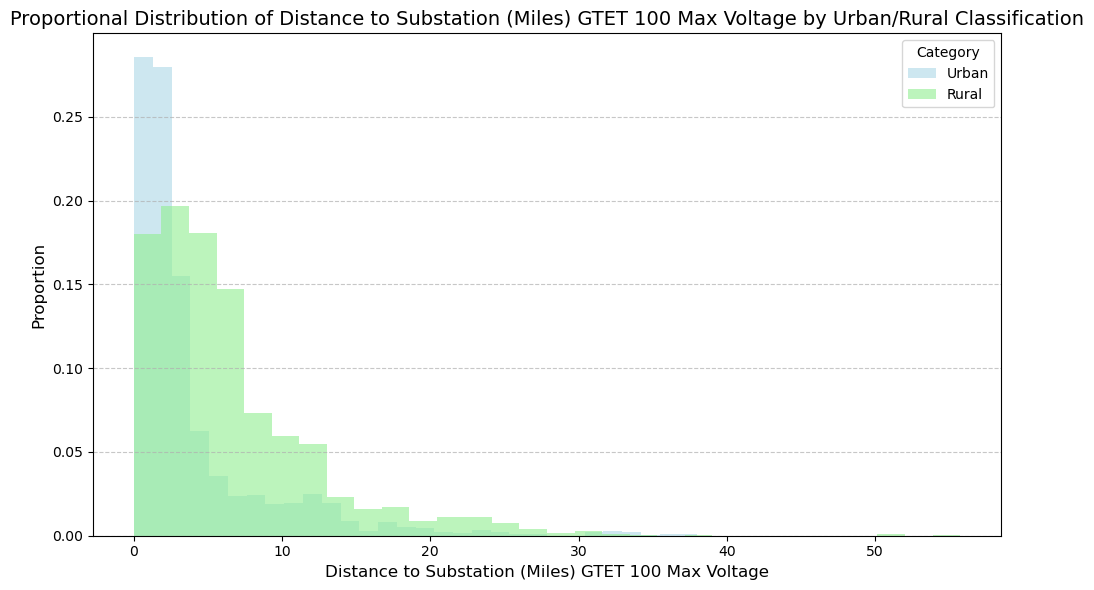

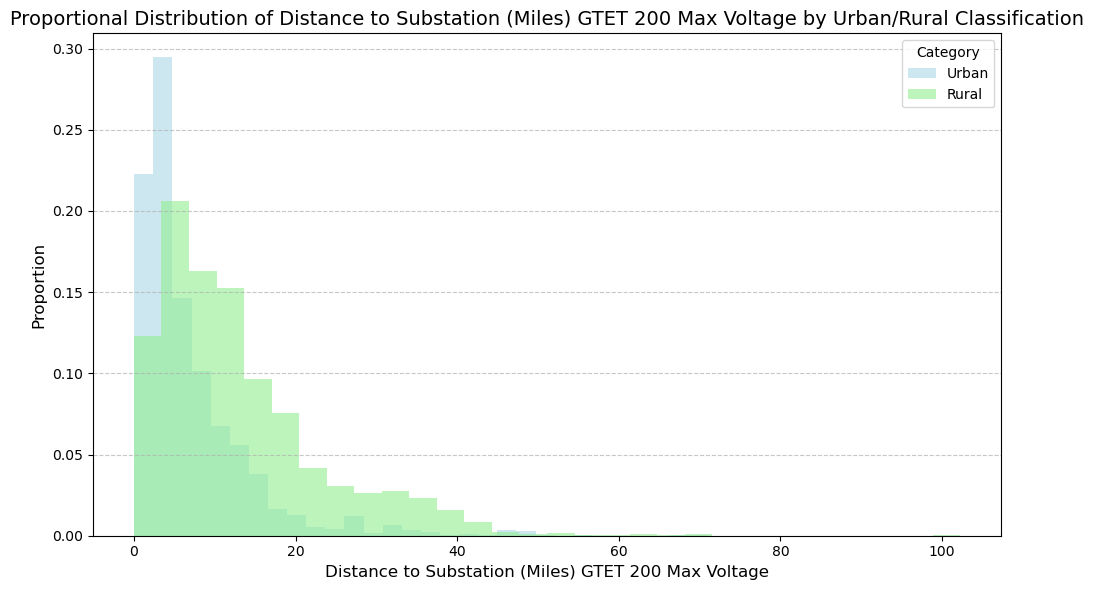

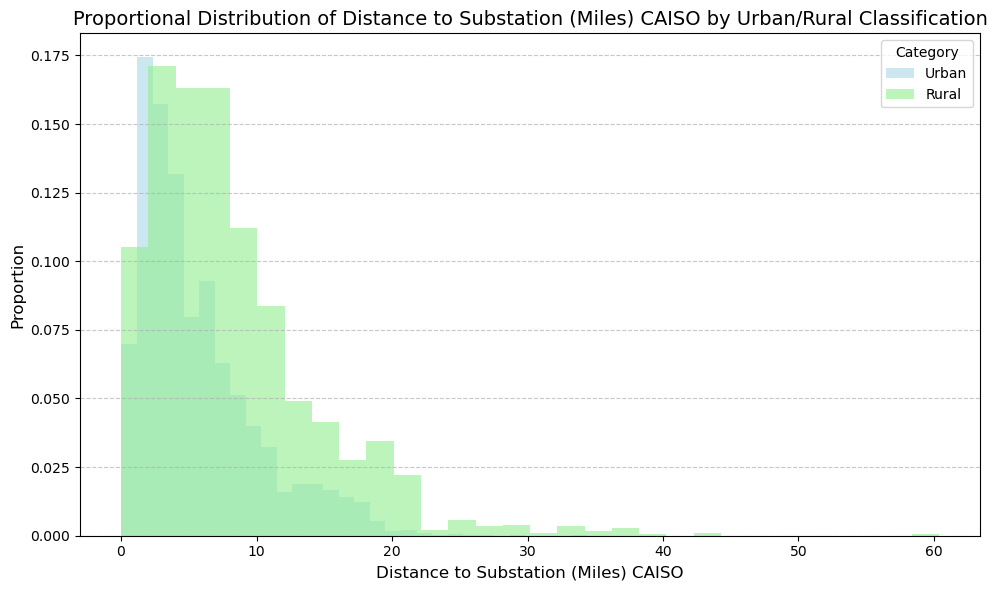

In [ ]:
import matplotlib.pyplot as plt

# Replace 'data' with 'df' (the DataFrame loaded in your notebook)
for column in [
    "Distance to Substation (Miles) GTET 100 Max Voltage",
    "Distance to Substation (Miles) GTET 200 Max Voltage",
    "Distance to Substation (Miles) CAISO",
]:
    plt.figure(figsize=(10, 6))
    
    # Filter data for Urban and Rural
    urban_data = solar_data_cleaned[solar_data_cleaned["Urban or Rural"] == "Urban"][column]
    rural_data = solar_data_cleaned[solar_data_cleaned["Urban or Rural"] == "Rural"][column]
    
    # Plot proportional histograms
    plt.hist(
        urban_data, bins=30, alpha=0.6, label="Urban", color="lightblue",
        weights=np.ones_like(urban_data) / len(urban_data)  # Normalize to proportions
    )
    plt.hist(
        rural_data, bins=30, alpha=0.6, label="Rural", color="lightgreen",
        weights=np.ones_like(rural_data) / len(rural_data)  # Normalize to proportions
    )
    
    # Add title, labels, and legend
    plt.title(f"Proportional Distribution of {column} by Urban/Rural Classification", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Proportion", fontsize=12)
    plt.legend(title="Category")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Show plot
    plt.tight_layout()
    plt.show()


### Distribution of Solar Installation Types by Urban/Rural Classification: Key Insights

#### **Overview of the Chart**
This grouped bar chart illustrates the distribution of solar installation types (Ground, Parking, and Rooftop) across urban and rural areas. The heights of the bars represent the frequency of installations for each type in each area.

---

#### **Key Observations**
1. **Dominance of Rooftop Installations in Urban Areas**:
   - Urban regions show a significantly higher count of **rooftop installations**, reflecting the limited availability of open land and the prevalence of building-integrated solar solutions.

2. **Ground Installations Leading in Rural Areas**:
   - Rural areas are dominated by **ground-mounted installations**, leveraging the abundance of open land for large-scale solar farms or stand-alone systems.

3. **Parking Installations**:
   - Urban areas have a noticeable count of **parking installations**, likely aligned with urban development projects like solar carports in commercial spaces.
   - Rural regions show minimal use of parking installations, consistent with their lower density of parking infrastructure.

---

#### **Insights for Planning**
1. **Urban Planning**:
   - The heavy reliance on rooftop installations suggests a need for incentives to further optimize urban spaces, such as utilizing parking spaces or implementing vertical solar designs.

2. **Rural Development**:
   - The prevalence of ground installations underscores the potential for expanding large-scale solar farms in rural areas. This could be further supported by targeted subsidies or infrastructure development.

3. **Opportunities for Hybrid Systems**:
   - Urban areas could explore hybrid systems combining rooftop and parking solar setups, especially in high-demand areas like business districts.
   - Rural areas could integrate ground installations with storage or microgrid solutions to enhance reliability.

---

The distribution reflects the natural advantages and constraints of urban and rural settings. Tailored policies and infrastructure investments can maximize solar energy generation while addressing the unique needs of each region. This data provides a foundation for strategic solar energy expansion.

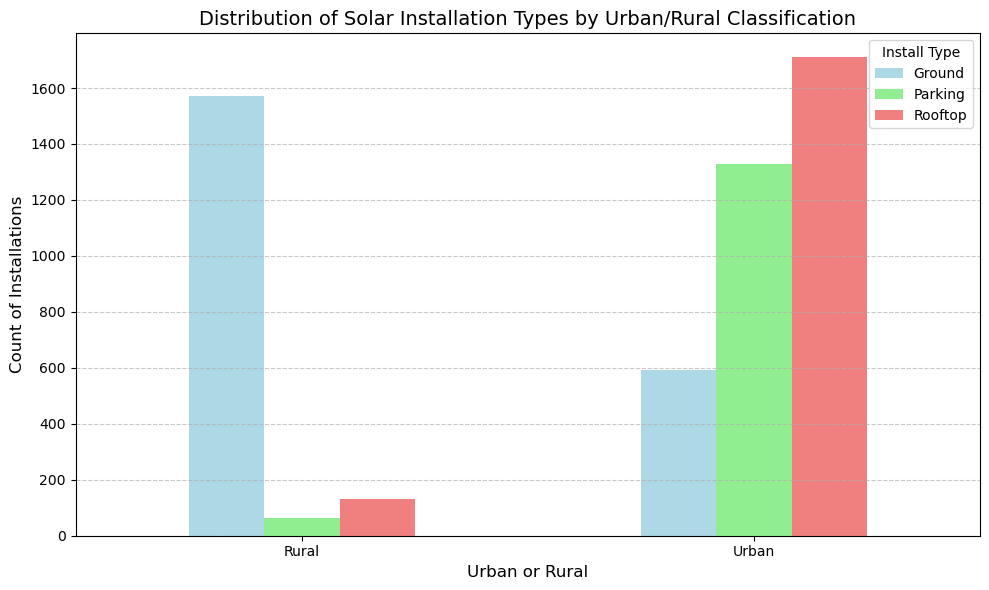

In [ ]:
import matplotlib.pyplot as plt

# Group data by Urban/Rural and Install Type to calculate counts
install_type_counts = solar_data_cleaned.groupby(["Urban or Rural", "Install Type"]).size().unstack()

# Plotting the grouped bar chart
install_type_counts.plot(
    kind="bar",
    figsize=(10, 6),
    stacked=False,  # Set to True for a stacked bar chart
    color=["lightblue", "lightgreen","lightcoral"]
)

# Adding titles and labels
plt.title("Distribution of Solar Installation Types by Urban/Rural Classification", fontsize=14)
plt.xlabel("Urban or Rural", fontsize=12)
plt.ylabel("Count of Installations", fontsize=12)
plt.legend(title="Install Type")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
